Titanic Survival Prediction Using Machine Learning

In [73]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Getting the Data

In [74]:
train = pd.read_csv('Titanic.csv')

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

# Data Exploration/Analysis

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects.

In [77]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

In [78]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

In [79]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Handling the missing values:

# Dropping  the “Cabin” column from the data frame as it won’t be of much importance

In [80]:
train = train.drop(columns='Cabin', axis=1)

Replacing the missing values in the “Age” column with the mean value

In [81]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times

In [82]:
print(train['Embarked'].mode())

0    S
dtype: object


Replacing the missing values in the “Embarked” column with mode value

In [83]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

Now let us check if there are still any cells remaining empty.

Running the isnull() command again, we get the satisfactory output, that no such empty cells are present.

# Transformation into a categorical column.

Let’s convert that into integer type values, and transform it into a categorical column:

In [84]:
train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

Now if we run the titanic_data.head() command again, we find that the values have been replaced successfully.

We also see, that there are few columns, which are not of much importance in this process. Let us get rid of them.

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Now we will analyze our data to see which variables are actually important to predict the value of the target variable. Hence, we are going to plot a heat map to see the correlation between the parameters and the target variable (Survived).

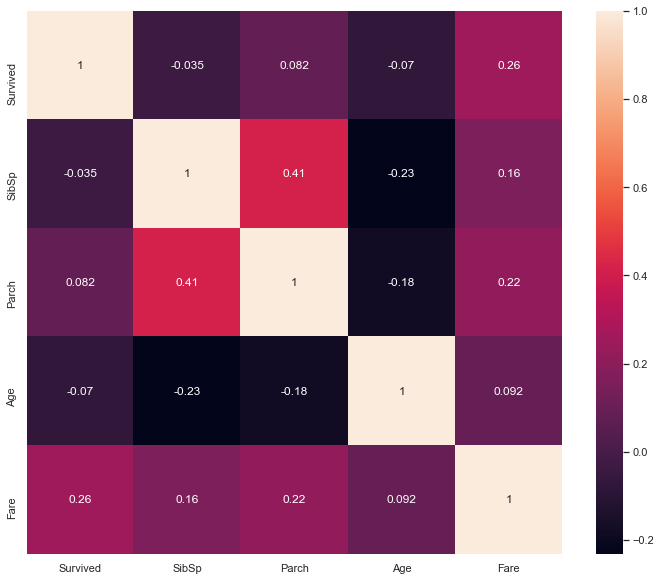

In [86]:
heatmap = sns.heatmap(train[["Survived","SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
sns.set(rc={'figure.figsize':(12,10)})

Just compare the survived column with the rest of the columns. The lighter the color is the more correlated the value is. Let’s compare the Survived with Sibsp you’re getting the value -0.035. It means that SibSp is not correlated to Survived.  Then Parch has a 0.082 value which shows very little correlation. Then Age, again no correlation. In the end, we have Fare whose value of correlation with the Survived variable is 0.26 which shows that the more the fare is, the more are the chances of survival.

We’ll visualize the impact of each feature on the target variable. Let us start with SibSp that is the no. of siblings or spouses a passenger has.

To visualize surviving probability with respect to SibSp we will plot a bar graph.

In [87]:
# Finding unique values
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

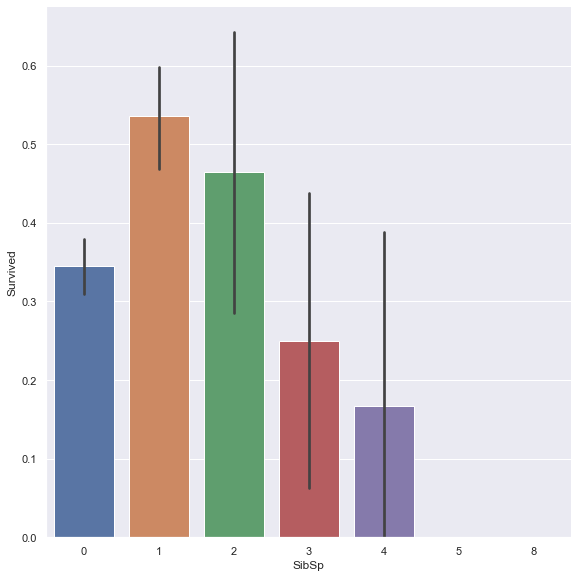

In [88]:
bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = train, kind="bar", height = 8)

Conclusion:

Passengers having 1 or 2 siblings have good chances of survival
More no. of siblings -> Fewer chances of survival

Age Column

We’ll plot a graph so as to see the distribution of age with respect to target variable.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


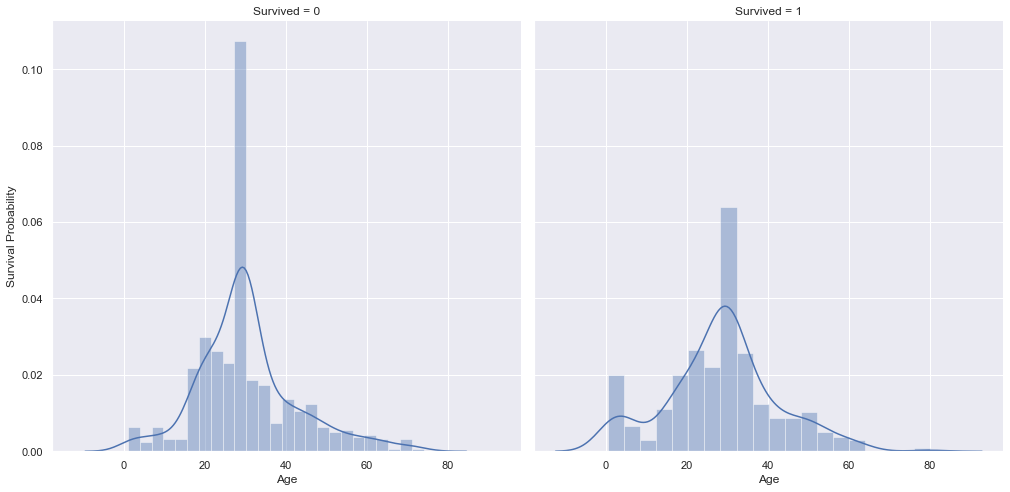

In [89]:
ageplot = sns.FacetGrid(train, col="Survived", height = 7)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

Conclusion More age -> less chances of survival!

Gender Column:
For gender we are simply going to use seaborn and will plot a bar graph.

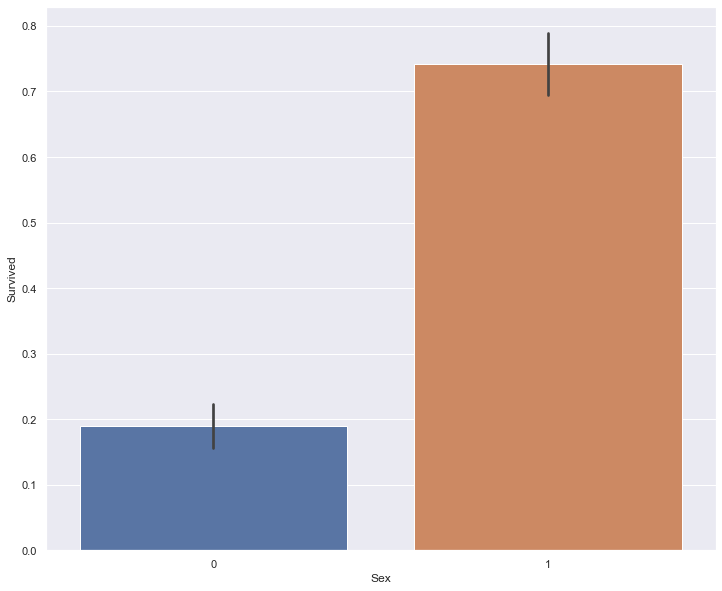

In [90]:
sexplot = sns.barplot(x="Sex", y="Survived", data=train)

from the above graph it’s quite obvious to say that man has less chances of survival over females. 

Pclass Column:
Let us now see whether the class plays any role in survival probability or not.

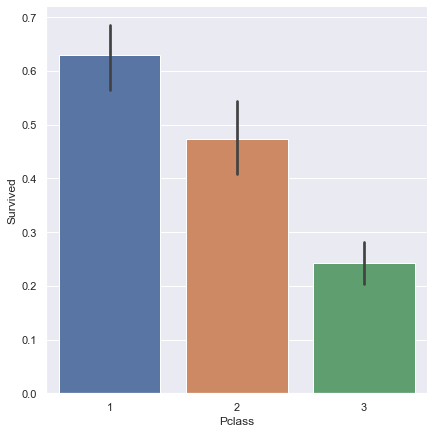

In [91]:
pclassplot = sns.catplot(x = "Pclass", y="Survived", data = train, kind="bar", height = 6)

So a first class passenger has more chances of survival over 2nd and 3rd class passengers & Similarly the 2nd class passengers have more chances of survival over 3rd class passengers.

one more thing to notice here is there are some features which have nothing to do with survival probability like PassengerId, Ticket number, Cabin number and also the name of the passenger. So we can safely drop them before building our ml model. Moreover, we also need to handle missing values. So, all of these tasks come under Data Preprocessing.

# Data Processing 

let’s see how many null values or missing values are there in each column. For this, we’re going to use isnull() and sum() methods. Write the following line in a new code cell and do shift + enter to run this cell.

In [96]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

As we can see there are 177 Missing values in Age column, and 687 missing values in Cabin column. Hence, we have to deal with these missing values in order to build a good machine learning model. Firstly, let us start by handling missing values of age column.

Handling Missing Values of Age Column
In order to handle null values, we are going to fill missing values with random values within the range of [mean value – standard deviation, mean value + standard deviation]. So that we get normally distributed data.

In [131]:
mean = train["Age"].mean()
std = train["Age"].std()

rand_age = np.random.randint(mean-std, mean+std, size = 1)
age_slice = train["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
train["Age"] = age_slice

# Again checking for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked       891
dtype: int64

Logistic Regression 

In [129]:
def models(x_train,y_train):

    from sklearn.linear_model import LogisticRegression
    logmodel = LogisticRegression()
    logmodel.fit(x_train,y_train)



In [130]:
predictions = logmodel.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Dropping Columns

In [ ]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
train.drop(col_to_drop, axis=1, inplace=True)
train.head(10)

Converting Categorical Variables to Numeric
Now as you can observe we have 2 categorical variables namely Sex and Embarked. Machine learning models only understand numbers and not alphabets. So we have to convert these categorical columns to numerical.

In [126]:
genders = {"male":0, "female":1}
train["Sex"] = train["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
train["Embarked"] = train["Embarked"].map(ports)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,NaN
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,NaN
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN


In [127]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked       891
dtype: int64

# Building Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

In [118]:

df_train_x = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Target variable column
df_train_y = train[['Survived']]

# Train Test Splitting
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=0)

# Random Forest Classifier

In [120]:
# Creating alias for Classifier
clf1 = RandomForestClassifier()

# Fitting the model using training data
clf1.fit(x_train, y_train)


# Predicting on test data
rfc_y_pred = clf1.predict(x_test)

# Calculating Accuracy to compare all models
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)


<ipython-input-120-9e6f334b452f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(x_train, y_train)


accuracy= 82.12290502793296


# Logistic Regression 

In [121]:
clf2 = LogisticRegression()
clf2.fit(x_train, y_train)
lr_y_pred = clf2.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100

print("accuracy=",lr_accuracy)



D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


accuracy= 80.44692737430168


K-Neighbor Classifier

In [125]:
clf3 = KNeighborsClassifier(5)
clf3.fit(x_train, y_train)
knc_y_pred = clf3.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100

print("accuracy=",knc_accuracy)

accuracy= 72.62569832402235


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Decision Tree Classifier

In [122]:
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(x_train, y_train)
dtc_y_pred = clf4.predict(x_test)
dtc_accuracy = accuracy_score(y_test,dtc_y_pred)*100

print("accuracy=",dtc_accuracy)

accuracy= 78.2122905027933


Support Vector machine

In [123]:
clf5 = svm.SVC()
clf5.fit(x_train, y_train)
svm_y_pred = clf5.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred)*100
print("accuracy=",svm_accuracy)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


accuracy= 72.06703910614524


In [134]:
from sklearn.svm import SVC

svc_lin= SVC(kernel='linear', random_state=0)
svc_lin.fit(x_train,y_train)

print('SVC Linear Training:', svc_lin.score(x_train,y_train))

return svc_lin

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC Linear Training: 0.7865168539325843


SyntaxError: 'return' outside function (<ipython-input-134-8891460d09ac>, line 8)

# Machine Learning Project Submission

In [135]:
y_pred = clf1.predict(x_test)
originaltest_data = pd.read_csv('titanic.csv')
submission = pd.DataFrame({
        "PassengerId": originaltest_data["PassengerId"],
        "Survived": y_pred
    })
submission.head(20)

ValueError: array length 179 does not match index length 891